##**Ridge Regression**

**Regularization**

1. Regularization is the common way of reducing overfitting.
2. to avoiding fitting noisy sample
3. to generate well on unseen data 
4. keep w small by constraints
5. is used to generalize the model with low bias and low variance.
6. Regularization is used penalize the value of w (slope) i.e it used to reduce the value of w.
from stipper line (where each unit increase in x , y will increase 2 times) it used to make less stipper.

<a href="https://ibb.co/MBhPgg1"><img src="https://i.ibb.co/cYv2yy8/Equation.jpg" alt="Equation" width="70%" border="0"></a>

Regularization is just panelty term that we add to loss function in Lasso and ridge regression.

`Regularization` we have to 2 parameters 
* lambda
* weight

As we increase a lambda , weight will reduces.
so then it move from high variance (overfitting) to high bias (underfitting)
 
`Lambda value will be selected using cross validation`.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/MkPk0PT/Lambda.jpg" alt="Lambda" width="70%" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

---
#### Compair `Lasso` and `Ridge` regression
---

<a href="https://imgbb.com/"><img src="https://i.ibb.co/S6Kgctq/Lasso-Vs-Ridge.jpg" alt="Lasso-Vs-Ridge" width="60%" border="0"></a>

In [0]:
# Importing some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics


# **california_housing Dataset**

---


**The following function returns:**
dataset : dict-like object with the following attributes:

**dataset.data :** ndarray, shape [20640, 8]

    Each row corresponding to the 8 feature values in order.
**dataset.target :** numpy array of shape (20640,)

    Each value corresponds to the average house value in units of 100,000.
**dataset.feature_names :** array of length 8

    Array of ordered feature names used in the dataset.
**dataset.DESCR :** string

    Description of the California housing dataset.


---



In [11]:
housing_data = california_housing.fetch_california_housing()
housing_data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

##**Normalizing input data**

In [0]:
housing_data.data = preprocessing.scale(housing_data.data)



---
The data contains 20,640 observations on 9 variables.

This dataset contains the **average house value as target variable**
and the following input variables (features): **average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude** in that order.

**Let us now extract the features and the target from the dataset and combine them in one data frame.**

---



In [13]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,3.734255e-16,8.557001e-16,2.704111e-16,-1.531384e-16,-6.465442e-17,6.064808e-19,1.256263e-15,-6.527810e-15,2.068558
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.153956
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00,0.149990
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00,1.196000
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01,1.797000
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01,2.647250
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00,5.000010




---

Let us use the function **df.corr()** to compute pairwise correlation of columns, excluding NA/null values.

---



In [15]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000




---

Let us consider only one feature say **MedInc**

---



In [16]:
df[['MedInc', 'Target']].describe()

,MedInc,Target
count,2.064000e+04,20640.000000
mean,3.734255e-16,2.068558
std,1.000024e+00,1.153956
min,-1.774299e+00,0.149990
25%,-6.881186e-01,1.196000
50%,-1.767951e-01,1.797000
75%,4.593063e-01,2.647250
max,5.858286e+00,5.000010


**Pre-Processing**

Notice that 75% of the data has price less than 2.65, but maximum price go as high as 5. Thus we should remove the extremely expensive houses which might prone noise.

In [0]:
df = df[df.Target < 5 ]

In [19]:
df.shape

(19648, 9)

In [0]:
X = df.iloc[:, 0:8]
y = df.iloc[:,8]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [46]:
housing_data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [49]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': list(X.columns), 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate')
ridge_df

variable,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
estimate,,,,,,,,
estimate,0.828716,0.107595,-0.282664,0.340104,0.008823,-0.032022,-0.812637,-0.793476
estimate0,0.828716,0.107595,-0.282664,0.340104,0.008823,-0.032022,-0.812637,-0.793476
estimate1,0.828573,0.107668,-0.282329,0.339689,0.008850,-0.032024,-0.811880,-0.792693
estimate2,0.828430,0.107741,-0.281995,0.339274,0.008878,-0.032026,-0.811125,-0.791913
estimate3,0.828288,0.107814,-0.281662,0.338859,0.008906,-0.032027,-0.810371,-0.791134
...,...,...,...,...,...,...,...,...
estimate195,0.801458,0.118627,-0.224981,0.269662,0.013124,-0.032127,-0.690598,-0.667127
estimate196,0.801324,0.118670,-0.224722,0.269350,0.013141,-0.032127,-0.690081,-0.666590
estimate197,0.801189,0.118713,-0.224464,0.269040,0.013158,-0.032126,-0.689564,-0.666054


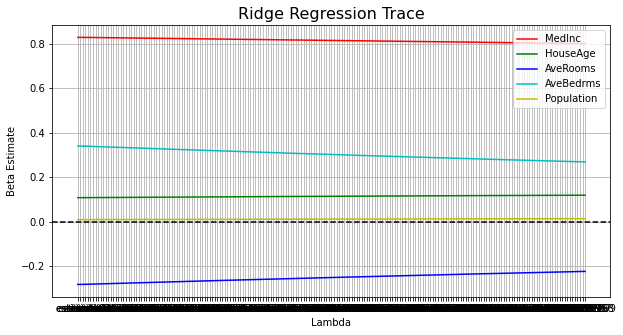

In [50]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.MedInc, 'r', ridge_df.HouseAge, 'g', ridge_df.AveRooms, 'b', ridge_df.AveBedrms, 'c', ridge_df.Population, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['MedInc','HouseAge','AveRooms','AveBedrms','Population'])
ax.grid(True)